# This notebook:
- **explores** response data for all questions (or items) by test type (state or national)
- **visualizes** differences between correct, incorrect, or partial responses at the state and national levels
- **models** if there is a statistical difference between the average response rates of at the fl state and national levels using t test confidence interval and hypothesis testing
- **concludes**
    - the average rate of correct, incorrect, and partial responses do not differ between the fl state k-5 and national k-5 levels
    - and while the result is expected since the same questions are being used between fl and national tests, 
    - **the insight is florida results are comparable to results at the national level**

# 0. Load libaries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# 1. Load and prep data

In [2]:
df = pd.read_excel('Data/Quiz_Item_Responses.xlsx') 
df.head()

,Item_ID,score_outcome,number_of_responses
0,FL01M_CC_L01_01,INCORRECT,81
1,FL01M_CC_L01_01,CORRECT,799
2,FL01M_CC_L01_02,INCORRECT,70
3,FL01M_CC_L01_02,CORRECT,810
4,FL01M_CC_L01_03,INCORRECT,141


In [3]:
# split item id into parts
df[["Item_1","Item_2","Item_3","Item_4","Item_5"]]= df["Item_ID"].str.split("_", expand = True)
df.head()

,Item_ID,score_outcome,number_of_responses,Item_1,Item_2,Item_3,Item_4,Item_5
0,FL01M_CC_L01_01,INCORRECT,81,FL01M,CC,L01,01,None
1,FL01M_CC_L01_01,CORRECT,799,FL01M,CC,L01,01,None
2,FL01M_CC_L01_02,INCORRECT,70,FL01M,CC,L01,02,None
3,FL01M_CC_L01_02,CORRECT,810,FL01M,CC,L01,02,None
4,FL01M_CC_L01_03,INCORRECT,141,FL01M,CC,L01,03,None


In [4]:
# total all responses by item_1
groupby = (df.groupby(['Item_1'])
           .agg({'number_of_responses': 'sum'})
           .rename(columns={'number_of_responses': 'total_item_1_responses'}))
df = df.join(groupby, on='Item_1')
df.head()

,Item_ID,score_outcome,number_of_responses,Item_1,Item_2,Item_3,Item_4,Item_5,total_item_1_responses
0,FL01M_CC_L01_01,INCORRECT,81,FL01M,CC,L01,01,None,57048
1,FL01M_CC_L01_01,CORRECT,799,FL01M,CC,L01,01,None,57048
2,FL01M_CC_L01_02,INCORRECT,70,FL01M,CC,L01,02,None,57048
3,FL01M_CC_L01_02,CORRECT,810,FL01M,CC,L01,02,None,57048
4,FL01M_CC_L01_03,INCORRECT,141,FL01M,CC,L01,03,None,57048


In [5]:
# total responses by item_1 and score_outcome
groupby2=(df.groupby(['Item_1','score_outcome'])
 .agg({'number_of_responses': sum})
 .rename(columns={'number_of_responses': 'total_item_1_outcome_responses'})
 .unstack())
groupby2.columns = ["_".join(x) for x in groupby2.columns.ravel()]
df = df.join(groupby2, on='Item_1')
df.head()

,Item_ID,score_outcome,number_of_responses,Item_1,Item_2,Item_3,Item_4,Item_5,total_item_1_responses,total_item_1_outcome_responses_CORRECT,total_item_1_outcome_responses_INCORRECT,total_item_1_outcome_responses_PARTIAL
0,FL01M_CC_L01_01,INCORRECT,81,FL01M,CC,L01,01,None,57048,40182,16510,356
1,FL01M_CC_L01_01,CORRECT,799,FL01M,CC,L01,01,None,57048,40182,16510,356
2,FL01M_CC_L01_02,INCORRECT,70,FL01M,CC,L01,02,None,57048,40182,16510,356
3,FL01M_CC_L01_02,CORRECT,810,FL01M,CC,L01,02,None,57048,40182,16510,356
4,FL01M_CC_L01_03,INCORRECT,141,FL01M,CC,L01,03,None,57048,40182,16510,356


In [6]:
# calculate the percentage of outcome_response of total responses by item_1
df['correct_perc']=df['total_item_1_outcome_responses_CORRECT']/df['total_item_1_responses']
df['incorrect_perc']=df['total_item_1_outcome_responses_INCORRECT']/df['total_item_1_responses']
df['partial_perc']=df['total_item_1_outcome_responses_PARTIAL']/df['total_item_1_responses']
df=df.loc[:,('Item_1','total_item_1_responses', 'total_item_1_outcome_responses_CORRECT',
             'total_item_1_outcome_responses_INCORRECT', 'total_item_1_outcome_responses_PARTIAL',
             'correct_perc','incorrect_perc','partial_perc')].drop_duplicates()
df=df.set_index('Item_1')
df

,total_item_1_responses,total_item_1_outcome_responses_CORRECT,total_item_1_outcome_responses_INCORRECT,total_item_1_outcome_responses_PARTIAL,correct_perc,incorrect_perc,partial_perc
Item_1,,,,,,,
FL01M,57048,40182,16510,356,0.704354,0.289405,0.006240
FL02M,40291,19834,16651,3806,0.492269,0.413268,0.094463
FL03M,73974,38199,32192,3583,0.516384,0.435180,0.048436
FL04M,102038,57805,33965,10268,0.566505,0.332866,0.100629
FL05M,74192,41944,21846,10402,0.565344,0.294452,0.140204
FL0KM,39432,29590,9272,570,0.750406,0.235139,0.014455
G2,12680,5896,5594,1190,0.464984,0.441167,0.093849
G3,3212,1645,1157,410,0.512142,0.360212,0.127646
G4,24395,12919,6613,4863,0.529576,0.271080,0.199344


# 2. Visualize data

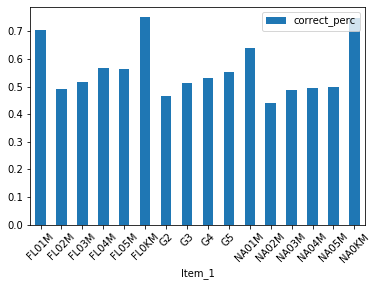

In [7]:
ax = df.plot.bar(y='correct_perc', rot=45) # join.plot(kind='bar'...) also works

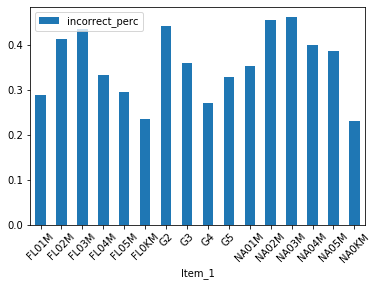

In [8]:
ax = df.plot.bar(y='incorrect_perc', rot=45) # x value is index when not specified

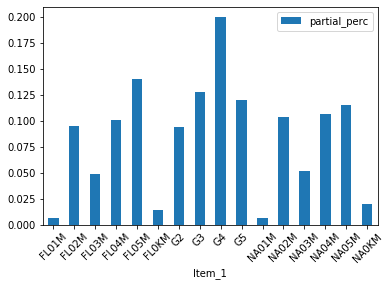

In [9]:
ax = df.plot.bar(y='partial_perc', rot=45) # x value is index when not specified

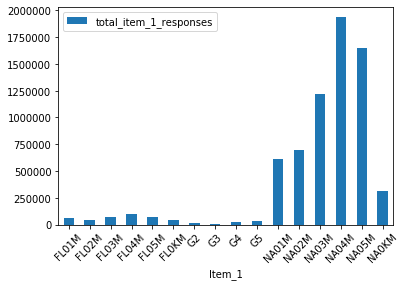

In [10]:
ax = df.plot.bar(y='total_item_1_responses', rot=45) 

In [11]:
# nsize (number of Item_IDs, or questions) per test
df.total_item_1_responses

Item_1
FL01M      57048
FL02M      40291
FL03M      73974
FL04M     102038
FL05M      74192
FL0KM      39432
G2         12680
G3          3212
G4         24395
G5         32731
NA01M     612590
NA02M     694239
NA03M    1217742
NA04M    1933215
NA05M    1651795
NA0KM     309257
Name: total_item_1_responses, dtype: int64

# 3. Model data

## Is there a significant difference (at the alpha=0.05 level) in the average correct_perc score_outcomes between the two independent populations (K-5 state tests (FL) and K-5 national tests (NA))?

Use t test. Note: t test is used for small samples but still robust enough to use and acts more conservation on large samples.

First, understand (sample) population.

Then, run t test.

    Steps:
        1. set up h0 and ha
        2. set up rejection region, tcrit
        3. gather data, calculate tobs
        4. compare tobs to tcrit

Lastly, evaluate confidence interval of difference in the mean between the two independent populations.

## 3.1. Examine n size and normality of sample populations

In [12]:
df=df.drop(['G2' , 'G3', 'G4', 'G5']) # drop G items from analysis

In [13]:
df['item'] = np.where(df.index.str.contains("FL"), 'FL', 'NA') # categorize Item_1 into FL or NA buckets
df

,total_item_1_responses,total_item_1_outcome_responses_CORRECT,total_item_1_outcome_responses_INCORRECT,total_item_1_outcome_responses_PARTIAL,correct_perc,incorrect_perc,partial_perc,item
Item_1,,,,,,,,
FL01M,57048,40182,16510,356,0.704354,0.289405,0.006240,FL
FL02M,40291,19834,16651,3806,0.492269,0.413268,0.094463,FL
FL03M,73974,38199,32192,3583,0.516384,0.435180,0.048436,FL
FL04M,102038,57805,33965,10268,0.566505,0.332866,0.100629,FL
FL05M,74192,41944,21846,10402,0.565344,0.294452,0.140204,FL
FL0KM,39432,29590,9272,570,0.750406,0.235139,0.014455,FL
NA01M,612590,392772,215906,3912,0.641166,0.352448,0.006386,NA
NA02M,694239,306263,316141,71835,0.441149,0.455378,0.103473,NA
NA03M,1217742,593289,561386,63067,0.487204,0.461006,0.051790,NA


In [14]:
# nsize of grades by test type (florida vs national)
df.item.value_counts() 

FL    6
NA    6
Name: item, dtype: int64

##### Distribution of correct perc by test type and test grade

In [15]:
na,fl=df[(df.item=='NA')]['correct_perc'], df[(df.item=='FL')]['correct_perc']

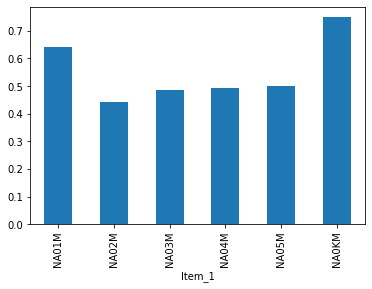

In [16]:
na.plot(kind='bar')

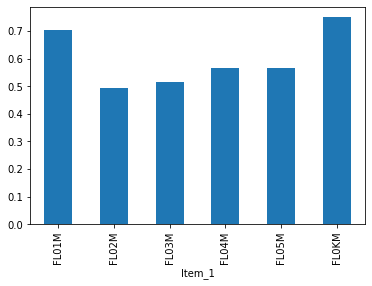

In [17]:
fl.plot(kind='bar')

In [18]:
na.describe()

count    6.000000
mean     0.552024
std      0.118032
min      0.441149
25%      0.488677
50%      0.496518
75%      0.605860
max      0.749587
Name: correct_perc, dtype: float64

In [19]:
fl.describe()

count    6.000000
mean     0.599210
std      0.104335
min      0.492269
25%      0.528624
50%      0.565924
75%      0.669892
max      0.750406
Name: correct_perc, dtype: float64

##### Test for normality

In [20]:
# shapiro test for normality
print(stats.shapiro(na)) # outputs t-statistic and pvalue
print(stats.shapiro(fl))

# validity of parametric tests assumes normal distribution
# shapiro test is used to test h0 hypothesis of normality, or
# that sample data is drawn from normal distribution

# if pvalue < 0.05, we reject h0 that sample data is drawn from normal distribution

# in both na and fl correct_perc arrays, the pvalue is greater than alpha > 0.05,
# so we fail to reject the h0 hypothesis 
# and say the sample data is drawn from a normal distribution

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
# http://www.sthda.com/english/wiki/normality-test-in-r

(0.8417159914970398, 0.13469387590885162)
(0.8799074292182922, 0.26863232254981995)


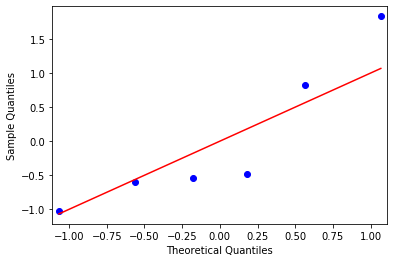

In [21]:
ax = sm.qqplot(na, fit=True, line='s')

# https://stats.stackexchange.com/questions/139708/qq-plot-in-python
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

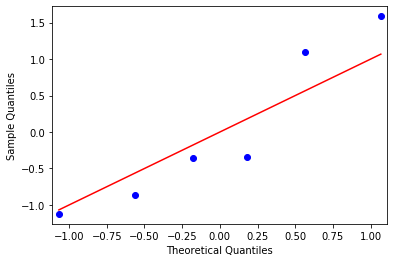

In [22]:
ax = sm.qqplot(fl, fit=True, line='s')

##### Side Note on Normality:

    "You have several options for handling your non normal data. Many tests, including the one sample Z test, T test and ANOVA assume normality. You may still be able to run these tests if your sample size is large enough (usually over 20 items)."
    
https://www.statisticshowto.com/probability-and-statistics/non-normal-distributions/

https://www.isixsigma.com/tools-templates/normality/dealing-non-normal-data-strategies-and-tools/

https://www.qualitymag.com/ext/resources/files/white_papers/minitab/Tips-and-Tricks-for-Analyzing-Non-Normal-Data-002.pdf

## 3.2 Run ttest

### 3.2.1. Hypothesis 
        H0: m1 = m2
        Ha: m1 != m2 
        alpha = 0.05
        two sided test, so alpha/2 = .025

### 3.2.2. Set up rejection region, tcrit

In [23]:
na_n, fl_n= len(na), len(fl)
print('National sample size: ', na_n)
print('Florida sample size: ', fl_n)

National sample size:  6
Florida sample size:  6


In [24]:
std_na, std_fl = np.std(na), np.std(fl)
print('National standard deviation: ', std_na)
print('Florida standard deviation: ', std_fl) # equal variances

National standard deviation:  0.10774772920272968
Florida standard deviation:  0.09524404769927049


*Note: if sample variances and/or sample sizes are unequal*

Use Sattertwaite's approximation for degrees of freedom (dof)

 [source](https://www.statisticshowto.com/satterthwaite-formula/)

Instead of dof = n1 + n2 - 2

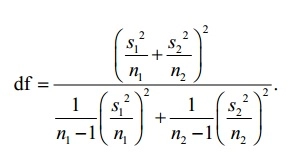


In [25]:
# calculate critical value manually

dof = ( (std_na**2/na_n) + (std_fl**2/fl_n) ) ** 2 / ( (1/(na_n-1)) * (std_na**2/na_n)**2 ) + ( (1/(fl_n-1)) * (std_fl**2/fl_n)**2 )

# dof used when unequal sample variances and/or unequal sample sizes
# dof is Sattertwaite's approximation

# rule of thumb is ratio of two stds do not exceed 2 to 1, 
# you would be okay with standard t test, as long as sample sizes not too unequal

dof2 = na_n + fl_n - 2

print("dof (n1+n2-2): ", dof2)
print("dof (Sattertwaite's approximation):  ", dof)

# use ttable to find tcrit for degrees of freedom 505 at alpha = 0.05 level, two-sided so alpha/2 = 0.025
# http://www.ttable.org/student-t-value-calculator.html

ltcrit, utcrit = -2.228, 2.228
print('lower critical value: ', ltcrit)
print('upper critical value: ', utcrit)

dof (n1+n2-2):  10
dof (Sattertwaite's approximation):   15.866482460398291
lower critical value:  -2.228
upper critical value:  2.228


In [26]:
# calculate critical value using package
print ('critical t (using dof = n1 + n2 - 2)= %.3f ' % (stats.t.ppf(1-0.025, dof2)))
print ('critical t (using Sattertwaite dof approximation) = %.3f ' % (stats.t.ppf(1-0.025, dof)))

critical t (using dof = n1 + n2 - 2)= 2.228 
critical t (using Sattertwaite dof approximation) = 2.121 


### 3.3.3. Gather data, calculate tobs

In [27]:
# calculate mean difference
na_mean, fl_mean = np.mean(na), np.mean(fl)
mean_diff = np.subtract(na_mean, fl_mean)
print('National mean of correct response per item: ', na_mean)
print('Florida mean of correct response per item: ', fl_mean)
print('Mean difference between na and fl: ', mean_diff)

National mean of correct response per item:  0.5520239101040583
Florida mean of correct response per item:  0.5992102462679233
Mean difference between na and fl:  -0.04718633616386503


**Standard independent 2 sample test that assumes equal population variances**
##### Pooled variance (equal variances)

Pooled T Procedures

![image.png](http://www.stat.yale.edu/Courses/1997-98/101/tpool.gif)

to calculate t statistic

![image.png](http://www.stat.yale.edu/Courses/1997-98/101/tstatp.gif)

which has a t(n1 + n2 -2) distribution ([source](http://www.stat.yale.edu/Courses/1997-98/101/meancomp.htm)).

In [28]:
# calculate tobs using pooled variance manually

truemean_diff = 0 # given hypothesis, m1-m2 = 0

std_pooled = np.sqrt( ( ((na_n-1)*(std_na**2)) + ((fl_n-1)*(std_fl**2) ) ) / (na_n+fl_n-2) )
# remove the -1 to get exact stats package result
se_meandiff =  std_pooled * np.sqrt( (1/na_n) + (1/fl_n) )

tobs = (mean_diff - truemean_diff) / se_meandiff
print("tobs using pooled variance: ", tobs)

tobs using pooled variance:  -0.8037224448611903


In [29]:
# calculate tobs using stats package where variance is equal
stats.ttest_ind(na,fl,equal_var = True)

Ttest_indResult(statistic=-0.73369485503946, pvalue=0.4799825798893872)

***Comparison* when variances are unequal**

**USE Welch Two Sample t-test**
#####  (unequal variances) ([source](http://www.stat.yale.edu/Courses/1997-98/101/meancomp.htm))

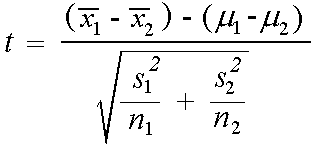

In [30]:
# calculate tobs using welch's t-staistic manually
truemean_diff = 0 # given hypothesis, m1-m2 = 0

std_pooled = np.sqrt( (std_na**2/na_n) + (std_fl**2/fl_n) )
se_meandiff =  std_pooled

tobs = (mean_diff - truemean_diff) / se_meandiff
print("tobs using welch's t-test: ", tobs)

tobs using welch's t-test:  -0.8037224448611903


In [31]:
# calculate tobs using stats package where variance is not equal
stats.ttest_ind(na,fl,equal_var = False) 

Ttest_indResult(statistic=-0.73369485503946, pvalue=0.480230734082603)

#### Review Stats Package (tobs,tcrit,pvalue)

   **NOTE:**

    "We can use this test [scipy.stats.ttest_ind], if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. 

    The test measures whether the average (expected) value differs significantly across samples. 

    If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. 

    If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages."
   [source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [32]:
# summary
# tcrit, tobs, and tobs pvalue using stats package assuming equal variances

print('National mean of correct response per item: ', na_mean)
print('Florida mean of correct response per item: ', fl_mean)
print('Mean difference between na and fl: ', mean_diff)

print ('DF =  %.3f' % dof2) 

tobs, pvalue = stats.ttest_ind(na,fl,equal_var = True)
tcrit = stats.t.ppf(1-0.025, dof2)

print ('tobs = %.3f' % tobs)
print ('pvalue = %.3f' % pvalue)
print ('tcrit = %.3f' % tcrit)

National mean of correct response per item:  0.5520239101040583
Florida mean of correct response per item:  0.5992102462679233
Mean difference between na and fl:  -0.04718633616386503
DF =  10.000
tobs = -0.734
pvalue = 0.480
tcrit = 2.228


### 3.3.4. Compare tobs to tcrit

tobs (-0.734) is not greater than tcrit (2.228) 
tobs (-0.734) is not less than -tcrit (-2.228) 

so tobs does not lie in the rejection region.

We fail to reject the null hypothesis and accept that the means of correct responses do not differ between the two indepedent populations (state tests (FL K-5) and national test (NA K-5)), t(15) = -0.734, p>0.05.

## 3.4. Confidence interval using t-test

In [33]:
print('Mean difference between na and fl: ', mean_diff)
print('Standard deviation of the mean difference between na and fl: ', se_meandiff)

Mean difference between na and fl:  -0.04718633616386503
Standard deviation of the mean difference between na and fl:  0.05870974049009482


##### Confidence interval for the difference in two means ([source](http://www.stat.yale.edu/Courses/1997-98/101/meancomp.htm))

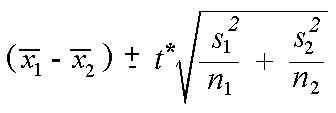

In [34]:
def ci(mean_diff, se_meandiff):
    tcrit = {95:1.96, 99:2.58, 90:1.65}
    for key in tcrit:
        lci, uci = mean_diff - (tcrit[key]*se_meandiff), mean_diff + (tcrit[key]*se_meandiff)
        print(key, "% confidence interval: ", lci, uci)
        
ci(mean_diff, se_meandiff)

95 % confidence interval:  -0.16225742752445088 0.06788475519672083
99 % confidence interval:  -0.1986574666283097 0.10428479430057963
90 % confidence interval:  -0.14405740797252148 0.04968473564479142


In [35]:
import statsmodels.stats.api as sm

cm = sm.CompareMeans(sm.DescrStatsW(na), sm.DescrStatsW(fl))
print(cm.tconfint_diff(usevar='unequal'))   # 95 % confidence interval 

(-0.1907784029160697, 0.0964057305883392)


### 3.3 Run same ttest on incorrect and partial percentages

The same results apply for incorrect and partial responses, that is a ttest showed there was not a significant difference between the mean percent rate of response types (incorrect or partial) between the two independent populations (FL K-5 and NA K-5 Tests).

### Incorrect Responses

In [36]:
na,fl=df[(df.item=='NA')]['incorrect_perc'], df[(df.item=='FL')]['incorrect_perc']
print(stats.shapiro(na)) # outputs t-statistic and pvalue
print(stats.shapiro(fl))

(0.8895382881164551, 0.3157758414745331)
(0.9319736361503601, 0.5954276323318481)


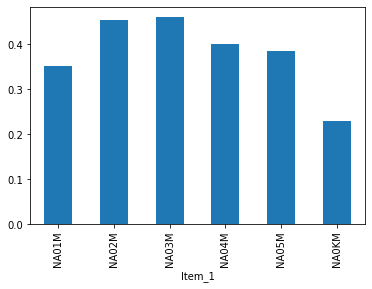

In [37]:
na.plot(kind='bar')

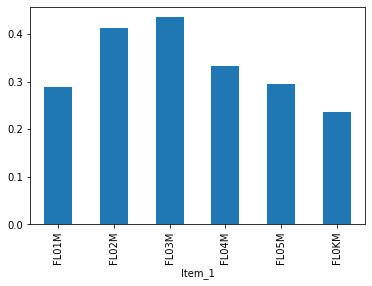

In [38]:
fl.plot(kind='bar')

In [39]:
# tcrit, tobs, and tobs pvalue using stats package assuming equal variances
na_n, fl_n= len(na), len(fl)
std_na, std_fl = np.std(na), np.std(fl)
na_mean, fl_mean = np.mean(na), np.mean(fl)
mean_diff = np.subtract(na_mean, fl_mean)

print('National mean of incorrect response per item: ', na_mean)
print('Florida mean of incorrect response per item: ', fl_mean)
print('Mean difference between na and fl: ', mean_diff)

print ('DF =  %.3f' % dof2) 

tobs, pvalue = stats.ttest_ind(na,fl,equal_var = True)
tcrit = stats.t.ppf(1-0.025, dof2)

print ('tobs = %.3f' % tobs)
print ('pvalue = %.3f' % pvalue)
print ('tcrit = %.3f' % tcrit)   

National mean of incorrect response per item:  0.3808942320522368
Florida mean of incorrect response per item:  0.33338520091858487
Mean difference between na and fl:  0.04750903113365196
DF =  10.000
tobs = 1.016
pvalue = 0.334
tcrit = 2.228


In [40]:
cm = sm.CompareMeans(sm.DescrStatsW(na), sm.DescrStatsW(fl))
print(cm.tconfint_diff(usevar='unequal'))   # 95 % confidence interval 

(-0.056831670115357016, 0.15184973238266092)


### Partial Responses

In [41]:
na,fl=df[(df.item=='NA')]['partial_perc'], df[(df.item=='FL')]['partial_perc']
print(stats.shapiro(na)) # outputs t-statistic and pvalue
print(stats.shapiro(fl))

(0.8601634502410889, 0.1897275149822235)
(0.931915283203125, 0.5949720144271851)


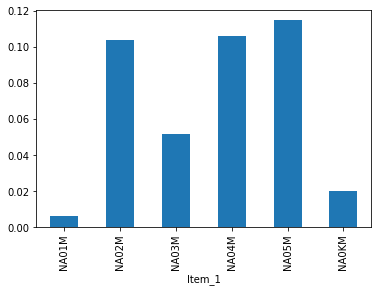

In [42]:
na.plot(kind='bar')

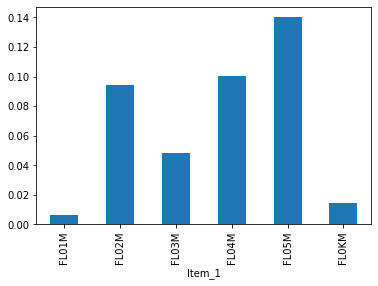

In [43]:
fl.plot(kind='bar')

In [44]:
# tcrit, tobs, and tobs pvalue using stats package assuming equal variances

na_n, fl_n= len(na), len(fl)
std_na, std_fl = np.std(na), np.std(fl)
na_mean, fl_mean = np.mean(na), np.mean(fl)
mean_diff = np.subtract(na_mean, fl_mean)

print('National mean of partial response per item: ', na_mean)
print('Florida mean of partial response per item: ', fl_mean)
print('Mean difference between na and fl: ', mean_diff)

print ('DF =  %.3f' % dof2) 

tobs, pvalue = stats.ttest_ind(na,fl,equal_var = True)
tcrit = stats.t.ppf(1-0.025, dof2)

print ('tobs = %.3f' % tobs)
print ('pvalue = %.3f' % pvalue)
print ('tcrit = %.3f' % tcrit)

cm = sm.CompareMeans(sm.DescrStatsW(na), sm.DescrStatsW(fl))
print(cm.tconfint_diff(usevar='unequal'))   # 95 % confidence interval 

National mean of partial response per item:  0.06708185784370492
Florida mean of partial response per item:  0.06740455281349177
Mean difference between na and fl:  -0.0003226949697868464
DF =  10.000
tobs = -0.011
pvalue = 0.991
tcrit = 2.228
(-0.06515118610812802, 0.06450579616855433)
